### Missing value guideline
- https://www.kaggle.com/alexisbcook/missing-values

In [1]:
all([0,0,0])
all([1,1,1])
any([1,1,0])

True

In [2]:
# Basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Feature Selection
from scipy.stats import chi2_contingency

In [3]:
import sys
import numpy as np
import matplotlib
import seaborn as sns
import tqdm
import sklearn
import pandas


print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "Matplotlib", matplotlib.__version__ )
print ( "Seaborn", sns.__version__ )
print ( "tqdm", tqdm.__version__ )
print ( "scikit-learn", sklearn.__version__ )
print ( "pandas", pandas.__version__ )



Python 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy 1.17.3
Matplotlib 3.0.3
Seaborn 0.9.0
tqdm 4.40.0
scikit-learn 0.22.1
pandas 0.25.3


In [4]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', -1) # default = 50
pd.set_option('display.max_rows', None) # default = 60
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
def percent_countplot(df, col_name, col_hue = None, order_by_value = False, topn = 20, dropna = True,
                      orient = 'v', annot_percent = True, figsize = (14,8)):
    
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Fill Paramter
    fs = 16 # Font size
    x_data = df.copy()
    x_col = col_name # column to count
    x_hue = col_hue # For divide column
    tittle = 'Distribution by '+x_col

    matplotlib.rc('xtick', labelsize = fs-2)     
    matplotlib.rc('ytick', labelsize = fs-2)
    fig = plt.figure(figsize= figsize)
    
    data_col = x_data   
        
    # topn > 0 we will combine the rest as "Other"
    if topn:
        counts = data_col[x_col].value_counts()
        topn_name = counts.nlargest(topn).index
        data_col[x_col] = data_col[x_col].where(data_col[x_col].isin(topn_name), other = 'Other')
    elif topn == 0:
        topn = data_col[x_col].nunique()
        
    # arrange order by value or index?
    if order_by_value :
        counts = data_col[x_col].value_counts()
        max_count = max(counts) # for adjust text alignment
    else:
        if str in list(map(type,data_col[x_col])) or not dropna:
            data_col[x_col] = data_col[x_col].astype(str)
        counts = data_col[x_col].value_counts().sort_index()
        max_count = max(counts.iloc[:topn]) # for adjust text alignment
        
    if orient == 'v':
        ax = sns.countplot(x = x_col, hue = x_hue, data= data_col, order = counts.iloc[:topn+1].index)
        ax.set_xlabel(x_col, color = 'r', fontsize = fs, fontweight='bold')
        ax.set_ylabel('Frequency', color = 'b', fontsize = fs, fontweight='bold')
        # Set rotation of xticks if name is too long
        data_col[x_col] = data_col[x_col].astype(str)
        xrot = 15 if max(list(map(len,data_col[x_col].unique()))) > 10 else 0
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    elif orient == 'h':
        ax = sns.countplot(y = x_col, hue = x_hue, data= data_col, order = counts.iloc[:topn+1].index)
        ax.set_ylabel(x_col, color = 'b', fontsize = fs, fontweight='bold')
        ax.set_xlabel('Frequency', color = 'r', fontsize = fs, fontweight='bold')
        xrot = 0
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
    total_count = sum(counts) # for calculate percentage
    # print(counts)
    
    # fig.suptitle('test title', fontsize=12)
    ax.set_title(tittle, fontsize = fs, fontweight='bold' )

    plt.xticks(rotation=xrot, color='r', size=16)
    plt.yticks(rotation=0, color='b', size=16)
    
    if x_hue == None and orient == 'v':
        for i, v in enumerate(counts[:topn+1]):
            ax.text(x = i, y=v + max_count*0.01 , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
            if annot_percent:
                ax.text(x = i, y= v/2, s=str('{:.2f}'.format(v*100/total_count))+'%',
                        color='yellow', fontweight='bold', size = 14,
                        horizontalalignment='center', 
                        verticalalignment='center' 
                        )
    elif x_hue == None and orient == 'h':
        for i, v in enumerate(counts[:topn+1]):
            ax.text(x = v + max_count*0.03, y=i , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
            if annot_percent:
                ax.text(x = v/2, y=i , s=str('{:.2f}'.format(v*100/total_count))+'%',
                        color='yellow', fontweight='bold', size = 14,
                        horizontalalignment='center', 
                        verticalalignment='center' 
                        )
    return ax

In [6]:
df = pd.read_csv('DrugAllergyKaggle_v3_050720.csv')
df = df.sort_values(by = 'Patient_ID').reset_index(drop=True); df.head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,nan,nan,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
1,7,0,75,1868,51.000,5.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,1.000
2,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


In [7]:
df[df.Drug_Rechallenge_Result.isnull()].head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,nan,nan,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
2,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan
5,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


In [8]:
df.Drug_Rechallenge_Result.value_counts(dropna=False)

nan      685
0.000    86 
1.000    28 
Name: Drug_Rechallenge_Result, dtype: int64

In [9]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
n_uniq = df.nunique()
print ("\nUnique values :  \n",n_uniq)
print ("\nTotal Unique values :  {:,}".format(n_uniq.values.sum()))

Rows     :  799
Columns  :  18

Features : 
 ['Patient_ID', 'Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Score', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group', 'Drug_Rechallenge_Result']

Missing values :   1582

Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            261
ELISpot_Result             77 
Naranjo_Score              13 
Naranjo_Category           4  
Exposure_Time              77 
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Resu

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 18 columns):
Patient_ID                 799 non-null int64
Gender                     799 non-null int64
Age_Year                   799 non-null int64
ELISpot_Control            799 non-null int64
ELISpot_Result             798 non-null float64
Naranjo_Score              431 non-null float64
Naranjo_Category           509 non-null float64
Exposure_Time              622 non-null float64
Steroid_Usage              799 non-null int64
Underlying_Condition_A     781 non-null float64
Underlying_Condition_B     799 non-null int64
Underlying_Condition_C     799 non-null int64
Underlying_Condition_D     785 non-null float64
Underlying_Condition_E     798 non-null float64
Suspicion_Score            799 non-null int64
Allergic_Reaction_Group    771 non-null float64
Drug_Group                 799 non-null int64
Drug_Rechallenge_Result    114 non-null float64
dtypes: float64(9), int64(9)
memory usage: 112.5 

In [11]:
df.isnull().sum()/len(df) * 100

Patient_ID                0.000 
Gender                    0.000 
Age_Year                  0.000 
ELISpot_Control           0.000 
ELISpot_Result            0.125 
Naranjo_Score             46.058
Naranjo_Category          36.295
Exposure_Time             22.153
Steroid_Usage             0.000 
Underlying_Condition_A    2.253 
Underlying_Condition_B    0.000 
Underlying_Condition_C    0.000 
Underlying_Condition_D    1.752 
Underlying_Condition_E    0.125 
Suspicion_Score           0.000 
Allergic_Reaction_Group   3.504 
Drug_Group                0.000 
Drug_Rechallenge_Result   85.732
dtype: float64

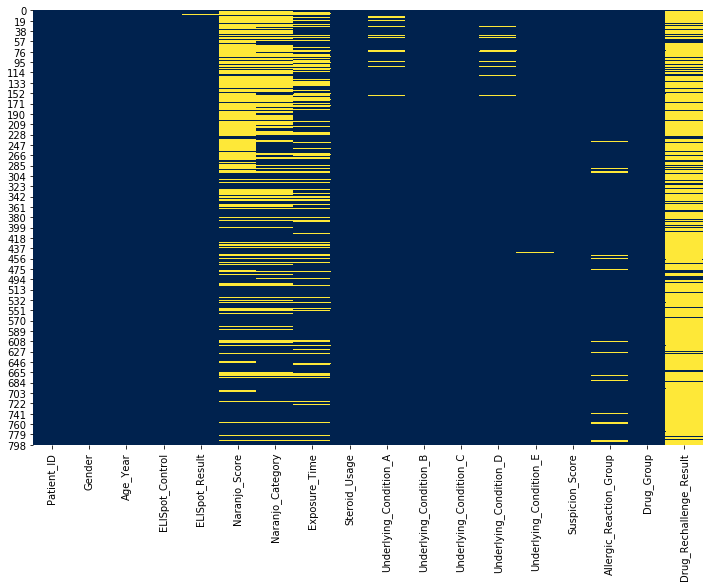

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


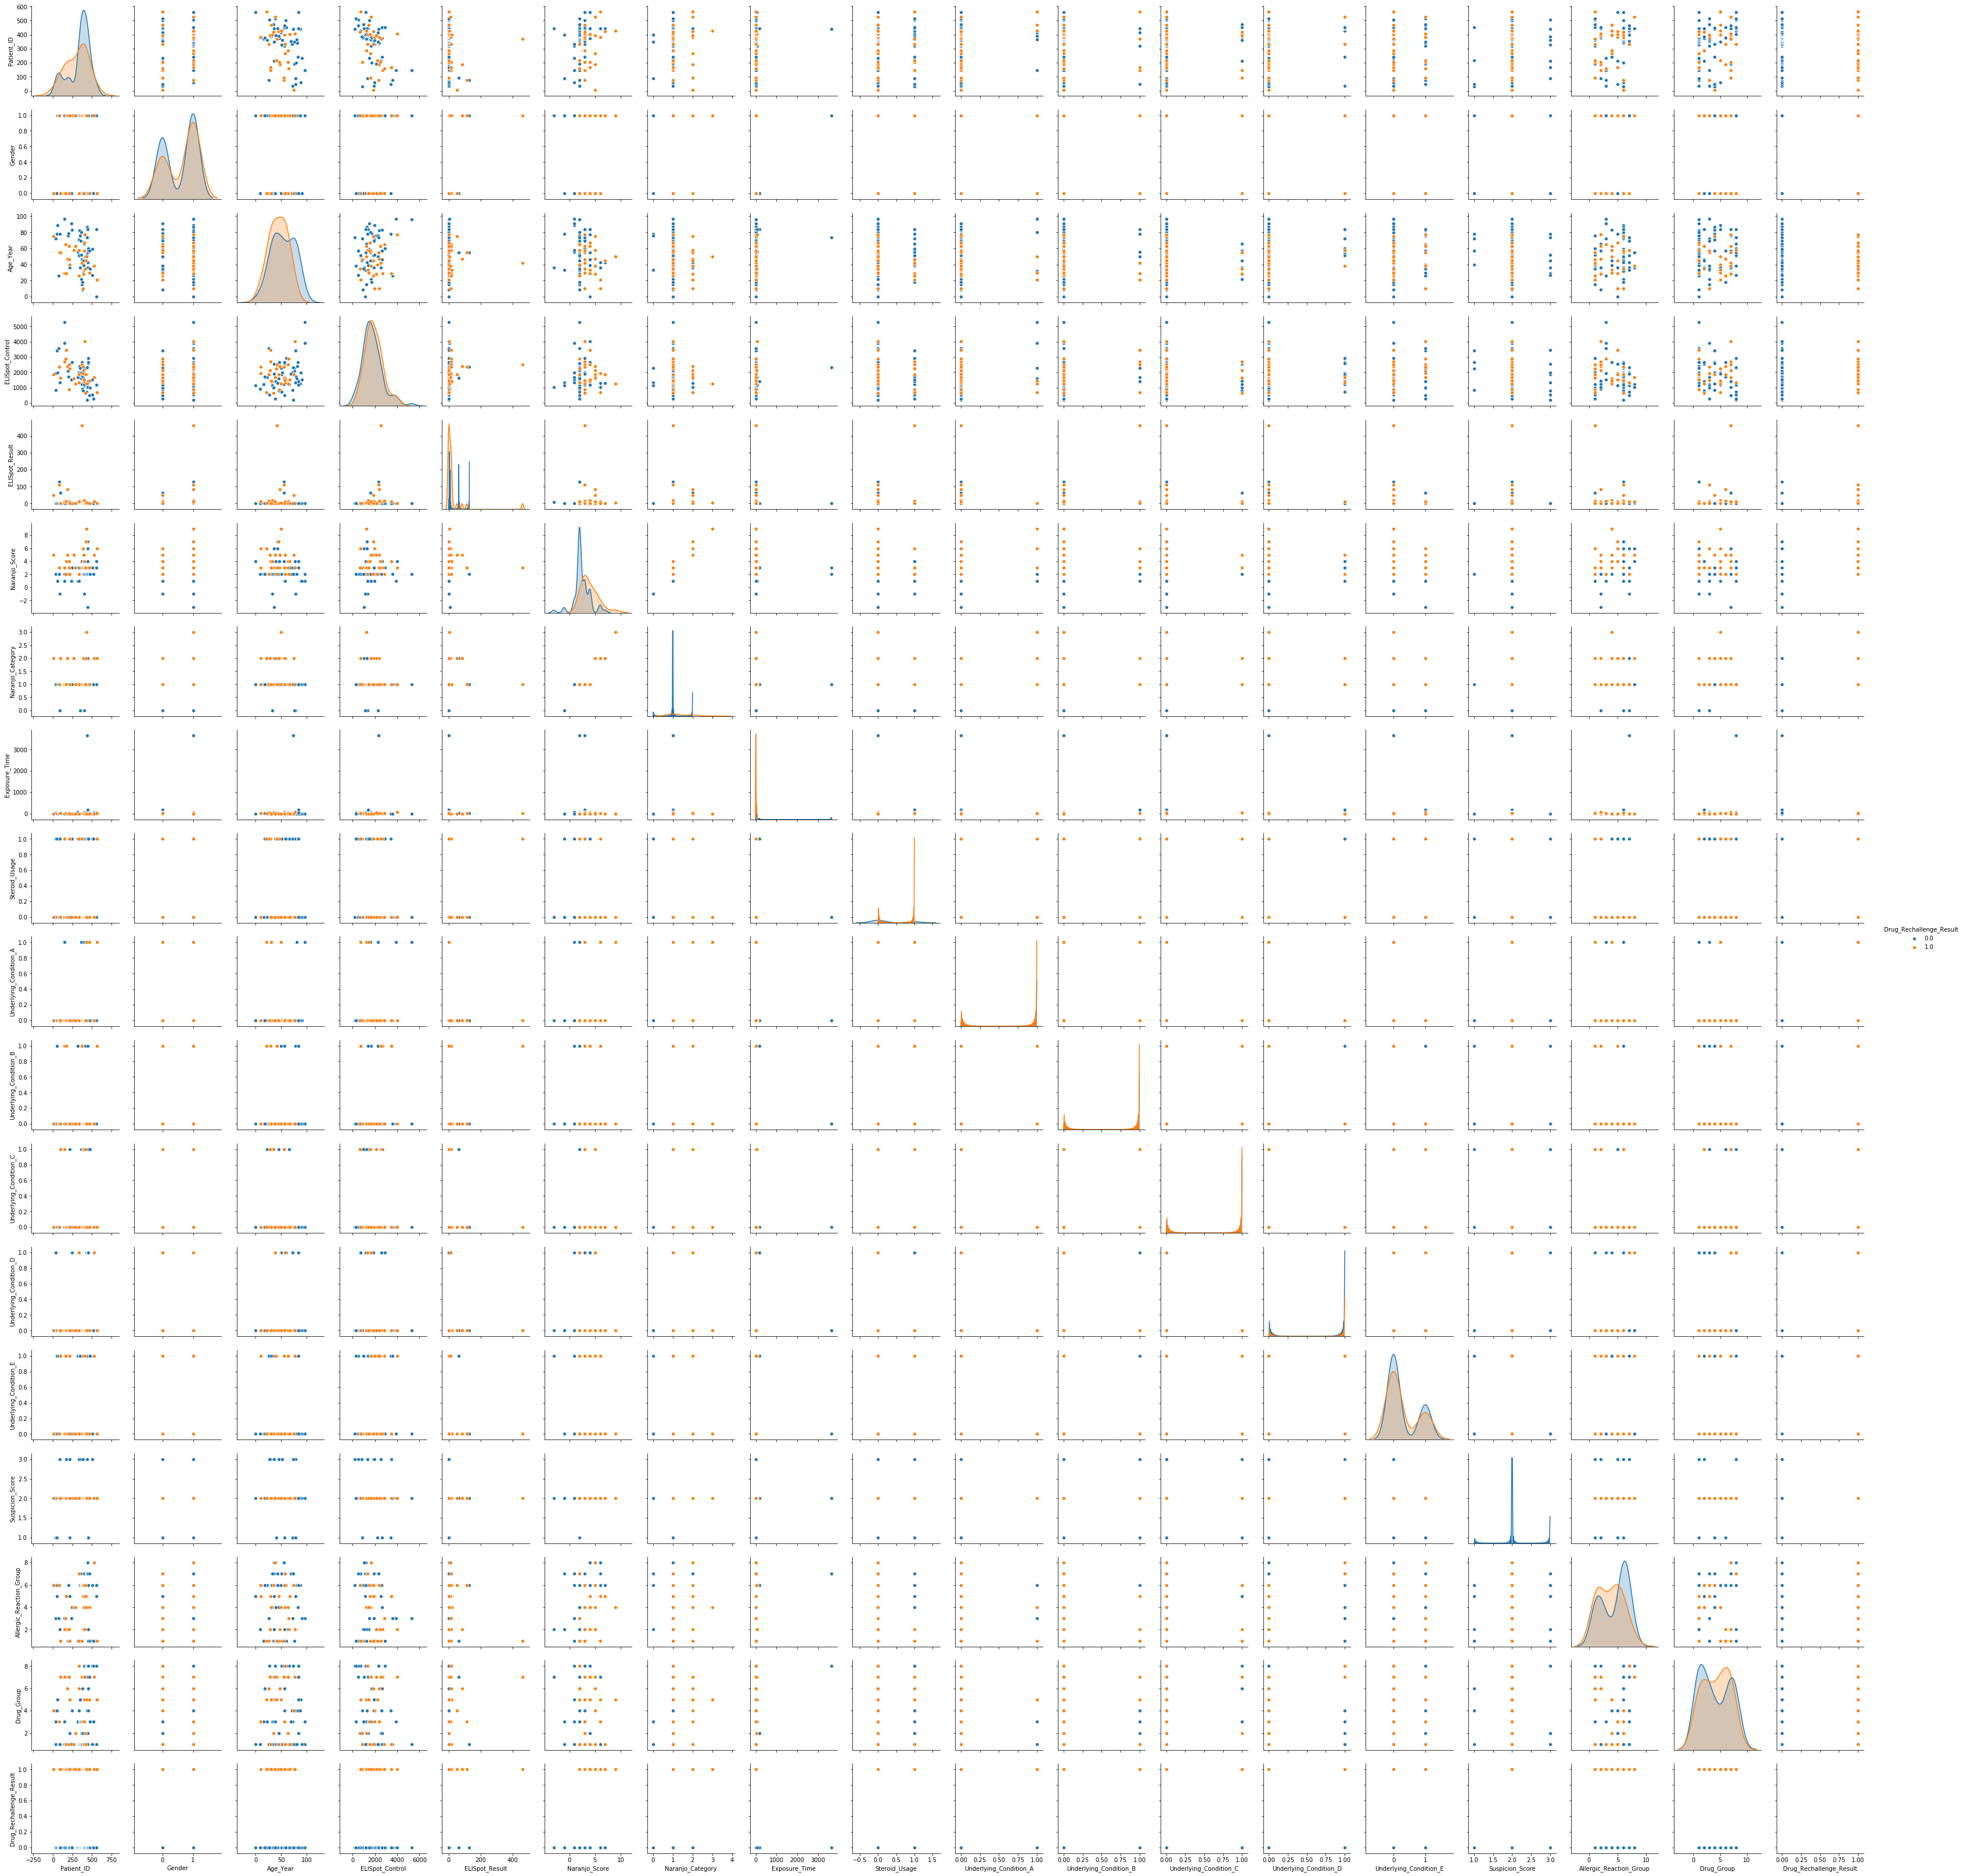

In [13]:
sns.pairplot(df, hue = 'Drug_Rechallenge_Result')

#### a.) Univariate selection 
**Chi-Square Test:** In general term, this method is used to test the independence of two events. If a dataset is given for two events, we can get the observed count and the expected count and this test measures how much both the counts are derivate from each other.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549804/Image1_c4jcxi.png)

| Feature(X)\Response(y) | Continuous            | Categorical |   |
|------------------------|-----------------------|-------------|---|
| **Continuous**         | Pearson's Correlation | LDA         |   |
| **Categorical**        | ANOVA                 | Chi-Square  |   |

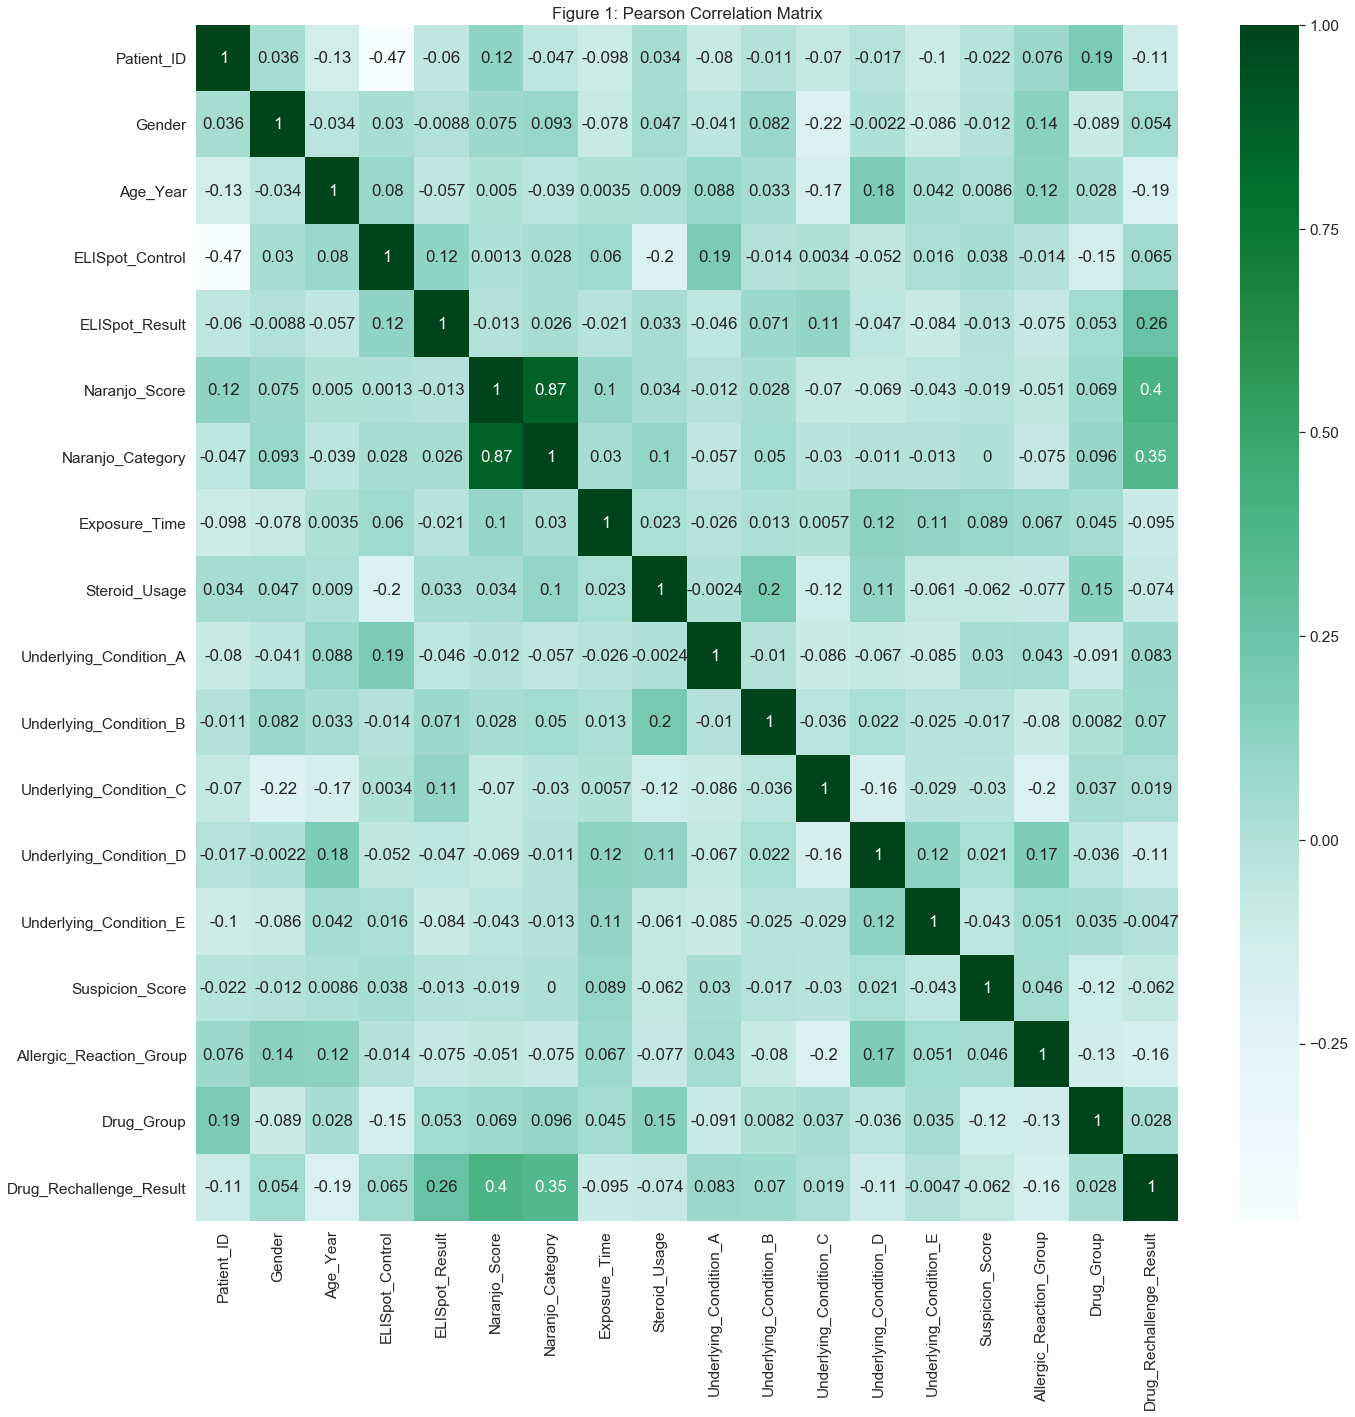

In [14]:
plt.figure(figsize=(22,22)) 
sns.set(font_scale=1.4)
plt.title('Figure 1: Pearson Correlation Matrix')
sns.heatmap(df.corr(), annot=True, cmap='BuGn')

In [15]:
import matplotlib
print ( "Matplotlib", matplotlib.__version__ )

Matplotlib 3.0.3


In [16]:
def chi2_indtest(df_feature, df_target, pvalue = 0.05, verbose =0):
    
    feature_list_chi = []
    feature_list_chi_score = []
    for series in df_feature:
        nl = "\n"

        crosstab = pd.crosstab(df_feature[series], df_target.values.ravel())
        if verbose: print(crosstab, nl)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        if verbose: print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
        if p < pvalue:
            feature_list_chi.append(series)
            feature_list_chi_score.append(chi2)
    return feature_list_chi, feature_list_chi_score

def plot_feature_importances(df, threshold = 0.90, normalized = True):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index(drop=True)
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    colors = ['b', 'g', 'r', 'c', 'm', 'y','#4ef7ae','#d96d09', '#2b9900','#f7184d', '#1b5c44','#f25e60','#e59400']

    if normalized:
        ax.barh(list(reversed(list(df.index[:15]))), 
                df['importance_normalized'].head(15), 
                align = 'center', edgecolor = 'k',color = colors)
        plt.xlabel('Normalized Importance')
    else:
        ax.barh(list(reversed(list(df.index[:15]))), 
                df['importance'].head(15), 
                align = 'center', edgecolor = 'k',color = colors)
        plt.xlabel('Importance')
        # Set the xticks format
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(int(x))))
        
#     for i, v in enumerate(df['importance_normalized'].head(15)):
#         ax.text(v + 0.001, i , '{:.4f}'.format(v), color='blue', fontweight='bold')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    
    
    # Plot labeling
    plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    n_fea = len(df)
    ax.plot(np.arange(n_fea)+1, df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    
    if threshold:
        # Index of minimum number of features needed for cumulative importance threshold
        # np.where returns the index so need to add 1 to have correct number
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        plt.vlines(x = importance_index + 1, ymin = 0, ymax = threshold, 
                   linestyles='--', colors = 'blue' )
        plt.text(importance_index +0.02*n_fea, 0, str(importance_index + 1), color='red', fontweight='bold')
        plt.text(importance_index +0.05*n_fea, threshold, str(threshold*100)+'%', color='orange', fontweight='bold')
        plt.show();

    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    
    return df

In [17]:
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",n_uniq)


Features : 
 ['Patient_ID', 'Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Score', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group', 'Drug_Rechallenge_Result']

Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            261
ELISpot_Result             77 
Naranjo_Score              13 
Naranjo_Category           4  
Exposure_Time              77 
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Result    2  
dtype: int64


In [18]:
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
target = ['Drug_Rechallenge_Result']

In [19]:
start = time()
pvalue = 1.00 
feature_list_chi, feature_list_chi_score = chi2_indtest(df[category_feature],df[target], pvalue = pvalue)
t = time() - start
print('Execution time = ', t, ' seconds')

print('Select only IMPORTANT feature which p-value less than', pvalue)
print('Number of IMPORTANT feature for Prediction:', len(feature_list_chi), '\n',feature_list_chi)

Execution time =  0.13944196701049805  seconds
Select only IMPORTANT feature which p-value less than 1.0
Number of IMPORTANT feature for Prediction: 11 
 ['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


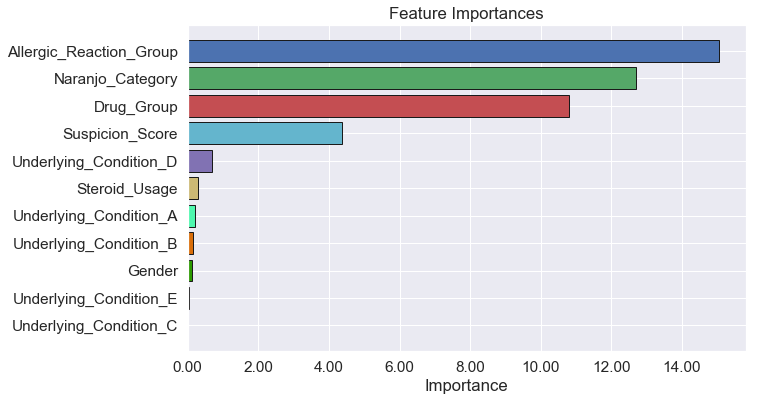

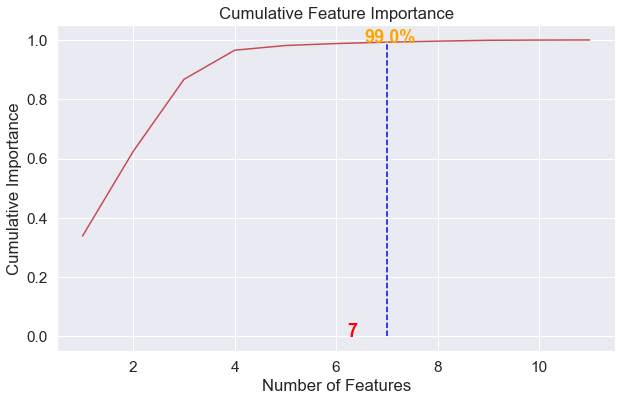

7 features required for 0.99 of cumulative importance


In [20]:
df_Chi2_feaimp = pd.DataFrame({'feature': feature_list_chi, 
                               'importance': feature_list_chi_score})\
                                .sort_values('importance', ascending = False)

df_Chi2_feaimp_norm = plot_feature_importances(df_Chi2_feaimp, threshold= 0.99, normalized=False)

In [21]:
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
print(category_feature)
category_feature.remove('Naranjo_Category')
print(category_feature)

['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
['Gender', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


In [22]:
start = time()
pvalue = 0.05
feature_list_chi, feature_list_chi_score = chi2_indtest(df[category_feature],df['Naranjo_Category'], pvalue = pvalue)
t = time() - start
print('Execution time = ', t, ' seconds')

print('Select only IMPORTANT feature which p-value less than', pvalue)
print('Number of IMPORTANT feature for Prediction:', len(feature_list_chi), '\n',feature_list_chi)

Execution time =  0.12206888198852539  seconds
Select only IMPORTANT feature which p-value less than 0.05
Number of IMPORTANT feature for Prediction: 5 
 ['Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_D', 'Allergic_Reaction_Group', 'Drug_Group']


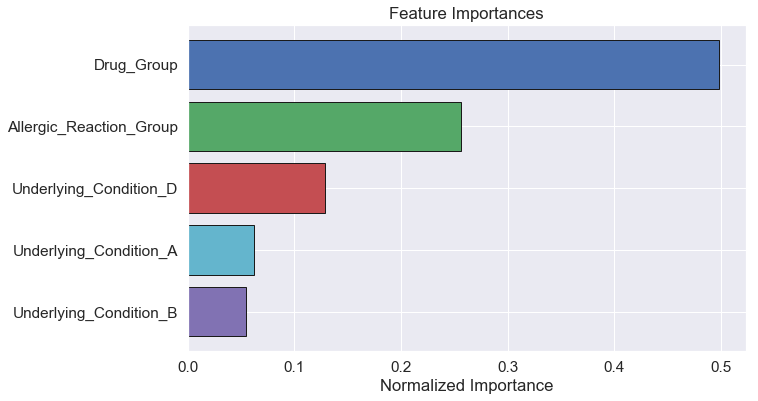

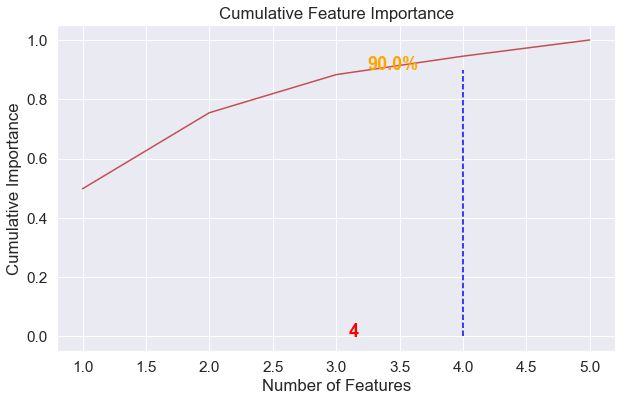

4 features required for 0.90 of cumulative importance


In [23]:
df_Chi2_feaimp = pd.DataFrame({'feature': feature_list_chi, 
                               'importance': feature_list_chi_score})\
                                .sort_values('importance', ascending = False)

df_Chi2_feaimp_norm = plot_feature_importances(df_Chi2_feaimp, threshold= 0.90, normalized=True)

# One Hot Encoder

In [24]:
# Before we use 'get_dummies' function we have to convert data type of all feature to be 'category' 
def cvt_type(df, col_list, dtype = 'category'):
    for col in col_list:
        df[col] = df[col].astype('category')
    return df

## Explore  `Naranjo_Score` and `Naranjo_Category` 

In [25]:
labels = [str(i)+': ' + name for i,name in zip(range(4), ['Doubtful', 'Possible', 'Probable', 'Definite'])]
labels

['0: Doubtful', '1: Possible', '2: Probable', '3: Definite']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


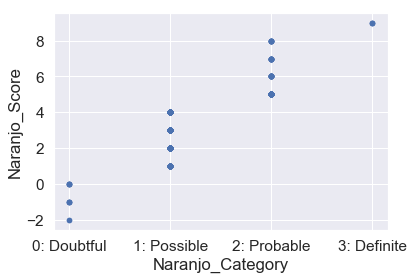

In [26]:
# df.plot(x='Naranjo_Category', y ='Naranjo_Score', c='Drug_Rechallenge_Result', kind='scatter')
ax = df.plot(x='Naranjo_Category', y ='Naranjo_Score', kind='scatter')
ax.set_xticks(range(4));
ax.set_xticklabels(labels);

In [27]:
# Naranjo_Score and Naranjo_Category have high-correlation, which Naranjo Category is a grouping category of Naranjo Score.
# Impute Naranjo_Category by Naranjo_Score
print(df[['Naranjo_Score','Naranjo_Category']].isnull().sum(axis='index'))
df[df[['Naranjo_Score','Naranjo_Category']].isnull().sum(axis='columns') == 1][['Naranjo_Score','Naranjo_Category']]

Naranjo_Score       368
Naranjo_Category    290
dtype: int64


,Naranjo_Score,Naranjo_Category
32,nan,2.000
48,nan,2.000
57,nan,2.000
58,nan,2.000
59,nan,1.000
60,nan,2.000
61,nan,2.000
63,nan,2.000
77,nan,2.000
78,nan,2.000


In [28]:
def Categorize_Naranjo_Score(score):
    if score <= 0:
        return 0
    elif score in range(1,5):
        return 1
    elif score in range(5,9):
        return 2
    elif score in range(9,11):
        return 3
    else:
        return score

# df = pd.read_csv('DrugAllergyKaggle_v3_050720.csv')
# df = df.sort_values(by = 'Patient_ID')
# df['Naranjo_Category'] = df.Naranjo_Score.apply(Categorize_Naranjo_Score) # ใช้ไม่ได้ เพราะจะแปลง cat ให้เป็น nan ด้วย
df.Naranjo_Category.fillna(value = df.Naranjo_Score.apply(Categorize_Naranjo_Score), inplace =True)

# df[df[['Naranjo_Score','Naranjo_Category']].isnull().sum(axis='columns') == 1][['Naranjo_Score','Naranjo_Category']]
df.iloc[493:494,:][['Naranjo_Score','Naranjo_Category']]

,Naranjo_Score,Naranjo_Category
493,-3.000,0.000


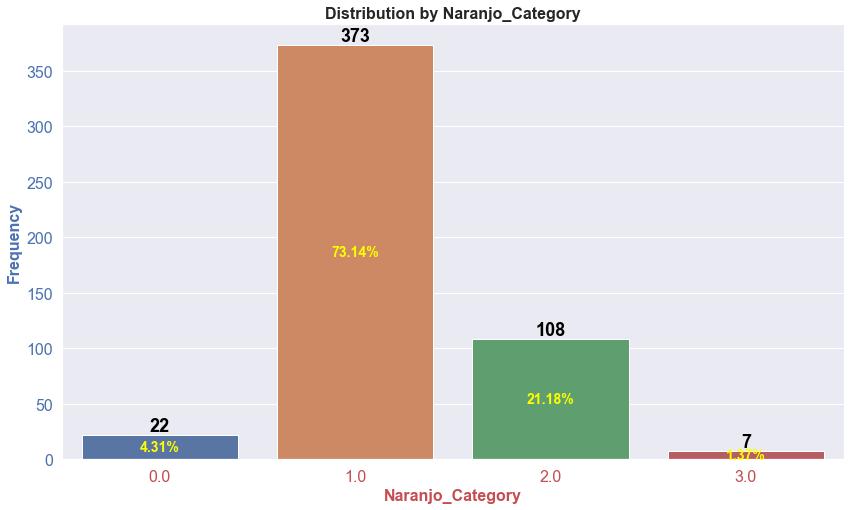

In [29]:
percent_countplot(df, col_name='Naranjo_Category',topn=0, dropna=True)
# sns.countplot(df.Naranjo_Category)
# df['Naranjo_Category'].value_counts(dropna=False).sort_index()

In [30]:
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
print(category_feature)
category_feature.remove('Naranjo_Category')
print(category_feature)

['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
['Gender', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


# Develop model for imputation

In [31]:
class OrdinalClassifier():
    """
    Original by: Muhammad Assagaf
    Available from: https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c
    """
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        from sklearn.base import clone
        
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[y][:,1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                 predicted.append(clfs_predict[y-1][:,1] - clfs_predict[y][:,1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[y-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg_Ord_clf = OrdinalClassifier(LogisticRegression(random_state = 7, fit_intercept= False))

In [33]:
selected_feature = feature_list_chi
df_temp_Naranjo_Category = df[selected_feature + ['Naranjo_Category']].copy()
df_train = df_temp_Naranjo_Category.dropna(subset = ['Naranjo_Category'])
df_unk = df_temp_Naranjo_Category.iloc[~df.index.isin(df_train.index)] # Select index that not in df_train
print(df.shape)
print(df_train.shape)

# Drop na row
df_train = df_temp_Naranjo_Category.dropna()
print(df_train.shape)
print(df_unk.shape)

(799, 18)
(510, 6)
(495, 6)
(289, 6)


In [34]:
df_train.isnull().sum()

Underlying_Condition_A     0
Underlying_Condition_B     0
Underlying_Condition_D     0
Allergic_Reaction_Group    0
Drug_Group                 0
Naranjo_Category           0
dtype: int64

In [35]:
# Convert data type to category
df_train_cvt = cvt_type(df_train, col_list=selected_feature)
X = df_train_cvt.drop('Naranjo_Category', axis= 1)
y = df_train_cvt[['Naranjo_Category']]

# Get dummies
X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=False)
print(len(X_encoded.columns))

22


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
LogReg_Ord_clf = OrdinalClassifier(LogisticRegression(random_state = 7, fit_intercept= False))
LogReg_Ord_clf.fit(X_encoded,y)

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(LogReg_Ord_clf.predict(X_encoded),y))
print(classification_report(LogReg_Ord_clf.predict(X_encoded),y))

0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.73      0.84       495
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.73       495
   macro avg       0.25      0.18      0.21       495
weighted avg       1.00      0.73      0.84       495



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
df_unk.isnull().sum()

Underlying_Condition_A     17 
Underlying_Condition_B     0  
Underlying_Condition_D     13 
Allergic_Reaction_Group    15 
Drug_Group                 0  
Naranjo_Category           289
dtype: int64

In [39]:
X_unk = df_unk[selected_feature]
X_unk.head()

,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_D,Allergic_Reaction_Group,Drug_Group
0,0.000,0,0.000,2.000,2
2,1.000,0,1.000,5.000,1
3,1.000,0,1.000,5.000,3
4,0.000,0,1.000,8.000,1
5,0.000,0,1.000,8.000,1


In [40]:
# Look result of unknown cat df_unk

# Convert data type to category
df_unk_cvt = cvt_type(df_unk, col_list=selected_feature)
X_unk = df_unk_cvt.drop('Naranjo_Category', axis= 1)
y_unk = df_unk_cvt[['Naranjo_Category']]

X_unk_dropna = X_unk.dropna()[selected_feature]

# Get dummies
X_unk_encoded = pd.get_dummies(X_unk_dropna, prefix_sep='_', drop_first=False)
print(len(X_unk_encoded.columns))

# Predicting result
LogReg_Ord_clf.predict(X_unk_encoded)

22


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
# Logistic Regression
def LogReg_HPTune(X, y, verbose = 0):
    """
    Purpose
    ----------
    Choosing a set of optimal hyperparameters for a Logistic Regression Classifier

    Parameters
    ----------
    X: Data set with all feature or predictor
    y: Data set with Class
    verbose: 0 mean not show summary of tuning
             1 mean show summary of tuning
    Returns:
    ----------
    Returns grid search model of Logistic Regression Classifier with tuned hyperparameter
    """  
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    
    # Logistic Regression Classifier
    LogReg_clf = LogisticRegression(random_state = 7, fit_intercept=False)
    
    # Create regularization hyperparameter space
    C = np.logspace(-5, 5, 100)
    
    # Create regularization penalty space
    penalty = ['none', 'l2']
    
    # Create class weight mode space
    class_weight = [None, 'balanced']
    
    # Create solver function space
    solver = ['saga', 'lbfgs', 'newton-cg']

    
    # Define Search Param
    param_dist = dict(C = C,
                      penalty = penalty,
                      class_weight = class_weight,
#                       solver = solver
                     )
    rs = RandomizedSearchCV(estimator=LogReg_clf,
                            param_distributions=param_dist,
                            refit=True,
                            scoring=score_param,
                            n_iter=n_iter_search,
                            cv=cv,
                            n_jobs=-1,
                            verbose =1,
                            random_state=7,
                            iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X,y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))

    elif verbose == 0:
        rs.fit(X,y)
    
    # Best parameter from RandomizedSearchCV
    bs_C = rs.best_params_['C'] 
    bs_penalty = rs.best_params_['penalty'] 
    bs_class_weight = rs.best_params_['class_weight']
#     bs_solver = rs.best_params_['solver'] 
    d_C = np.log10(bs_C)
    
    param_grid = dict(C = np.append(bs_C,np.logspace(d_C-2,d_C+2,num=100)),
                      penalty = [bs_penalty],
                      class_weight = [bs_class_weight],
#                       solver = [bs_solver]
                     )
    gs = GridSearchCV(estimator=LogReg_clf, 
                      param_grid=param_grid,
                      refit=True,
                      scoring=score_param,
                      cv=cv,
                      n_jobs=-1,
                      verbose =1,
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return rs, gs


In [42]:
# Naive Bayes
def NB_HPTune(X, y, verbose = 0):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    
    gnb = GaussianNB(priors=None)
    param_dist = dict(var_smoothing = np.logspace(-16,0,200) ) # default is 1e-9
    rs = RandomizedSearchCV(estimator=gnb,
                             param_distributions=param_dist,
                             scoring=score_param,
                             refit=True,
                             n_iter = n_iter_search,
                             cv=cv,
                             n_jobs=-1,
                             random_state=7,
                             iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X, y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))
    elif verbose == 0:
        rs.fit(X, y)
    
    # Best parameter from RandomizedSearchCV
    bs_var_sm = rs.best_params_['var_smoothing']
    bs_var_sm_pw = np.log10(bs_var_sm)
    
    param_grid = dict(var_smoothing = np.logspace(bs_var_sm_pw*0.9,bs_var_sm_pw*1.1,50))
    gs = GridSearchCV(estimator=gnb, 
                      param_grid=param_grid,
                      scoring=score_param,
                      refit=True,
                      cv=cv,
                      n_jobs=-1, 
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X, y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))
    elif verbose == 0:
        gs.fit(X, y)
    
    return rs, gs

In [43]:
# accuracy
# balanced_accuracy
# average_precision
# roc_auc
# f1
# f1_micro
score_param = 'f1_micro' # Score for tune model
n_iter_search = 100 # Max candidate parameter for RandomizedSearchCV
cv = 5 # Number of k-fold cross validation
LogReg_rs, LogReg_gs = LogReg_HPTune(X_encoded,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   14.0s finished
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:    4.6s finished
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
print(LogReg_gs.best_score_)
print(LogReg_rs.best_score_)
print(LogReg_rs.best_params_)
print(LogReg_gs.best_params_)

0.7272727272727273
0.7272727272727273
{'penalty': 'l2', 'class_weight': None, 'C': 0.00041320124001153346}
{'C': 0.00041320124001153346, 'class_weight': None, 'penalty': 'l2'}


In [45]:
print(classification_report(LogReg_gs.predict(X_encoded),y))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.73      0.84       495
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.73       495
   macro avg       0.25      0.18      0.21       495
weighted avg       1.00      0.73      0.84       495



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Imbalanced Class Issue
- Try with over sampling

In [46]:
print(df_train.shape)
df_train.head()

(495, 6)


,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_D,Allergic_Reaction_Group,Drug_Group,Naranjo_Category
1,0.000,0,0.000,6.000,4,2.000
10,0.000,1,0.000,2.000,1,1.000
17,0.000,0,0.000,6.000,4,1.000
22,0.000,0,1.000,3.000,1,1.000
25,0.000,0,1.000,3.000,3,1.000


In [47]:
df_train_cat_0 = df_train[df_train.Naranjo_Category == 0]; print(df_train_cat_0.shape)
df_train_cat_1 = df_train[df_train.Naranjo_Category == 1]; print(df_train_cat_1.shape)
df_train_cat_2 = df_train[df_train.Naranjo_Category == 2]; print(df_train_cat_2.shape)
df_train_cat_3 = df_train[df_train.Naranjo_Category == 3]; print(df_train_cat_3.shape)

(22, 6)
(360, 6)
(106, 6)
(7, 6)


In [48]:
def makeOverSamplesADASYN(X,y):
    from imblearn.over_sampling import ADASYN
    """
    Purpose
    ----------
    Increasing the observation of minority class 

    Parameters
    ----------
    X: Independent Variable in DataFrame
    y: Dependent Variable in Pandas DataFrame format
    Returns:
    ----------
    Returns Independent and Dependent with resampling minarity class
    """
    X_resampled, y_resampled = ADASYN().fit_sample(X, y)
    return(X_resampled, y_resampled)

In [49]:
X_resampled, y_resampled = makeOverSamplesADASYN(X_encoded,y)

Using TensorFlow backend.


(1428, 22)
(1428, 1)


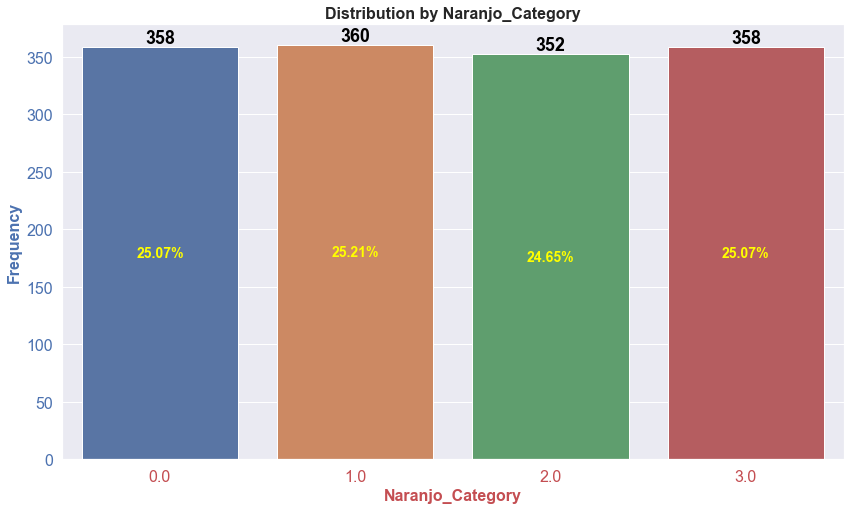

In [50]:
print(X_resampled.shape)
print(y_resampled.shape)
percent_countplot(y_resampled, col_name='Naranjo_Category')

In [51]:
LogReg_Ord_clf = OrdinalClassifier(LogisticRegression(random_state = 7, fit_intercept= False))
LogReg_Ord_clf.fit(X_resampled, y_resampled)
print(accuracy_score(LogReg_Ord_clf.predict(X_resampled),y_resampled))
print(classification_report(LogReg_Ord_clf.predict(X_resampled),y_resampled))

0.6008403361344538
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       326
           1       0.12      0.37      0.18       113
           2       0.62      0.37      0.47       585
           3       1.00      0.89      0.94       404

    accuracy                           0.60      1428
   macro avg       0.60      0.59      0.57      1428
weighted avg       0.70      0.60      0.63      1428



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector

In [52]:
# accuracy
# balanced_accuracy
# average_precision
# roc_auc
# f1
# f1_micro
# f1_macro
# f1_weighted
score_param = 'f1_micro' # Score for tune model
n_iter_search = 100 # Max candidate parameter for RandomizedSearchCV
cv = 5 # Number of k-fold cross validation
LogReg_rs, LogReg_gs = LogReg_HPTune(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   20.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.4s finished
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 498 out of 505 | elapsed:   21.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:   21.2s finished
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [53]:
print(LogReg_rs.best_score_)
print(LogReg_gs.best_score_)
print(LogReg_rs.best_params_)
print(LogReg_gs.best_params_)

print(classification_report(LogReg_gs.predict(X_resampled),y_resampled))

0.5560224089635855
0.5560224089635855
{'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.04328761281083057}
{'C': 0.04328761281083057, 'class_weight': 'balanced', 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69       325
         1.0       0.64      0.61      0.62       380
         2.0       0.38      0.42      0.40       312
         3.0       1.00      0.87      0.93       411

    accuracy                           0.67      1428
   macro avg       0.67      0.66      0.66      1428
weighted avg       0.69      0.67      0.68      1428



In [54]:
# Compare with un-oversampling
print(classification_report(LogReg_gs.predict(X_encoded),y))

              precision    recall  f1-score   support

         0.0       0.05      0.05      0.05        22
         1.0       0.64      0.74      0.68       312
         2.0       0.30      0.23      0.26       140
         3.0       1.00      0.33      0.50        21

    accuracy                           0.55       495
   macro avg       0.50      0.34      0.37       495
weighted avg       0.53      0.55      0.53       495



In [55]:
# Look result of unknown cat df_unk

# Predicting result
LogReg_gs.predict(X_unk_encoded)

array([3., 2., 2., 2., 2., 2., 2., 2., 2., 3., 1., 1., 2., 2., 2., 2., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 1., 2., 3., 2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 2., 2., 2.,
       1., 1., 1., 2., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 0., 1.,
       1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1.,
       2., 2., 2., 1., 3., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 3., 1., 1., 2., 2., 3., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 2., 3., 1., 3., 0., 0., 0., 1., 1., 2., 2., 2., 2., 2.,
       2., 0., 0., 1., 1.

#### Try with only one feature that highest dependency
- Chi-square test p-value < 0.05
- Drug_Group

In [56]:
# Get dummies
X_encoded = pd.get_dummies(X[['Drug_Group']], prefix_sep='_', drop_first=False)
print(len(X_encoded.columns))

8


In [57]:
LogReg_Ord_clf.fit(X_encoded, y)
print(accuracy_score(LogReg_Ord_clf.predict(X_encoded),y))
print(classification_report(LogReg_Ord_clf.predict(X_encoded),y))

0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.73      0.84       495
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.73       495
   macro avg       0.25      0.18      0.21       495
weighted avg       1.00      0.73      0.84       495



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: U

In [58]:
LogReg_Ord_clf.fit(X[['Drug_Group']], y)
print(accuracy_score(LogReg_Ord_clf.predict(X[['Drug_Group']]),y))
print(classification_report(LogReg_Ord_clf.predict(X[['Drug_Group']]),y))

0.5757575757575758
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.74      0.71      0.73       374
         2.0       0.17      0.15      0.16       121
         3.0       0.00      0.00      0.00         0

    accuracy                           0.58       495
   macro avg       0.23      0.22      0.22       495
weighted avg       0.60      0.58      0.59       495



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: U

In [59]:
X_resampled, y_resampled = makeOverSamplesADASYN(X_encoded,y)

In [60]:
LogReg_Ord_clf.fit(X_resampled, y_resampled)
print(accuracy_score(LogReg_Ord_clf.predict(X_resampled),y_resampled))
print(classification_report(LogReg_Ord_clf.predict(X_resampled),y_resampled))

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.47214484679665736
              precision    recall  f1-score   support

         0.0       0.80      0.34      0.48       865
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.57      0.14        47
         3.0       1.00      0.68      0.81       524

    accuracy                           0.47      1436
   macro avg       0.47      0.40      0.36      1436
weighted avg       0.85      0.47      0.59      1436



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
X_resampled, y_resampled = makeOverSamplesADASYN(X[['Drug_Group']],y)
LogReg_Ord_clf.fit(X_resampled[['Drug_Group']], y_resampled)
print(accuracy_score(LogReg_Ord_clf.predict(X_resampled[['Drug_Group']]),y_resampled))
print(classification_report(LogReg_Ord_clf.predict(X_resampled[['Drug_Group']]),y_resampled))

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3326474622770919
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.62      0.39      0.48       603
         3.0       0.69      0.29      0.41       855

    accuracy                           0.33      1458
   macro avg       0.33      0.17      0.22      1458
weighted avg       0.66      0.33      0.44      1458



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Try with two target class:  Naranjo_Category 1&2
- Due to Naranjo_Category 0&3 is too small to handle

In [62]:
df_temp_Naranjo_Category = df[selected_feature + ['Naranjo_Category']].copy()
df_train = df_temp_Naranjo_Category.dropna(subset = ['Naranjo_Category'])

df_unk = df_temp_Naranjo_Category.iloc[~df.index.isin(df_train.index)] # Select index that not in df_train
print(df.shape)
print(df_train.shape)

# Drop na row
df_train = df_temp_Naranjo_Category.dropna()
print(df_train.shape)
print(df_unk.shape)

(799, 18)
(510, 6)
(495, 6)
(289, 6)


In [63]:
df_train.isnull().sum()

Underlying_Condition_A     0
Underlying_Condition_B     0
Underlying_Condition_D     0
Allergic_Reaction_Group    0
Drug_Group                 0
Naranjo_Category           0
dtype: int64

In [64]:
df_train_w1_2 = df_train[df_train.Naranjo_Category.isin([1,2])]
df_train_w1_2.shape

(466, 6)

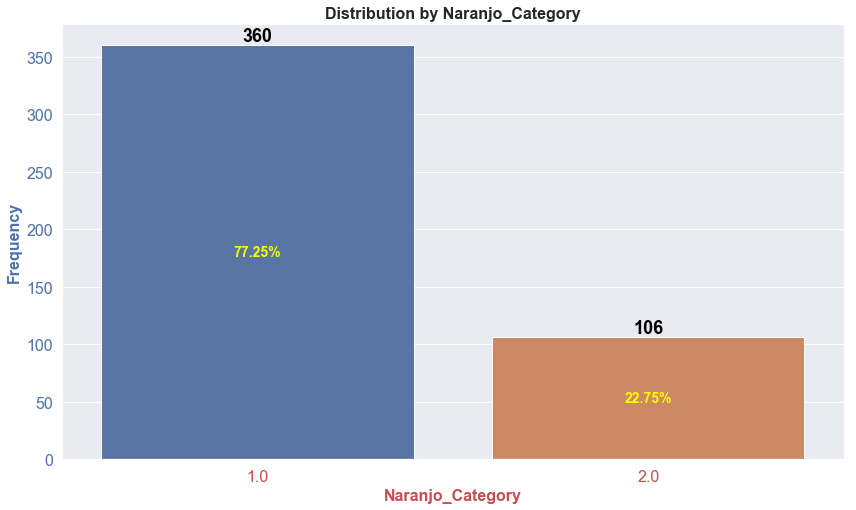

In [65]:
X_w1_2 = df_train_w1_2.drop('Naranjo_Category', axis= 1)
y_w1_2 = df_train_w1_2[['Naranjo_Category']]
percent_countplot(y_w1_2, col_name='Naranjo_Category')

- Without one hot encoding

In [66]:
LogReg_clf = LogisticRegression(random_state=7)
LogReg_clf.fit(X_w1_2,y_w1_2.values.ravel())
print(accuracy_score(LogReg_clf.predict(X_w1_2),y_w1_2))
print(classification_report(LogReg_clf.predict(X_w1_2),y_w1_2))

0.7725321888412017
              precision    recall  f1-score   support

         1.0       1.00      0.77      0.87       466
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77       466
   macro avg       0.50      0.39      0.44       466
weighted avg       1.00      0.77      0.87       466



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- With one hot encoding

In [67]:
# Convert data type to category
df_train_cvt = cvt_type(df_train_w1_2, col_list=selected_feature)
X_w1_2 = df_train_cvt.drop('Naranjo_Category', axis= 1)
y_w1_2 = df_train_cvt[['Naranjo_Category']]

# Get dummies
X_w1_2_encoded = pd.get_dummies(X_w1_2, prefix_sep='_', drop_first=False)
print(X_w1_2_encoded.shape)
print(y_w1_2.shape)

(466, 22)
(466, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [68]:
LogReg_clf = LogisticRegression(random_state=7, fit_intercept=False)
LogReg_clf.fit(X_w1_2_encoded,y_w1_2.values.ravel())
print(accuracy_score(LogReg_clf.predict(X_w1_2_encoded),y_w1_2))
print(classification_report(LogReg_clf.predict(X_w1_2_encoded),y_w1_2))

0.7725321888412017
              precision    recall  f1-score   support

         1.0       1.00      0.77      0.87       466
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77       466
   macro avg       0.50      0.39      0.44       466
weighted avg       1.00      0.77      0.87       466



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- with oversampling

In [69]:
X_resampled, y_resampled = makeOverSamplesADASYN(X_w1_2_encoded,y_w1_2)
print(y_resampled['Naranjo_Category'].value_counts())

LogReg_clf = LogisticRegression(random_state=7, fit_intercept=False)
LogReg_clf.fit(X_resampled, y_resampled)
print(accuracy_score(LogReg_clf.predict(X_resampled),y_resampled))
print(classification_report(LogReg_clf.predict(X_resampled),y_resampled))

1.000    360
2.000    356
Name: Naranjo_Category, dtype: int64
0.7332402234636871
              precision    recall  f1-score   support

         1.0       0.87      0.69      0.77       455
         2.0       0.60      0.82      0.69       261

    accuracy                           0.73       716
   macro avg       0.73      0.75      0.73       716
weighted avg       0.77      0.73      0.74       716



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# Test with data before oversampling
print(classification_report(LogReg_clf.predict(X_w1_2_encoded),y_w1_2))

              precision    recall  f1-score   support

         1.0       0.87      0.81      0.84       387
         2.0       0.29      0.39      0.34        79

    accuracy                           0.74       466
   macro avg       0.58      0.60      0.59       466
weighted avg       0.77      0.74      0.75       466



In [71]:
LogReg_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
import collections
collections.Counter(LogReg_clf.predict(X_unk_encoded))

Counter({1.0: 235, 2.0: 21})

In [73]:
# accuracy
# balanced_accuracy
# average_precision
# roc_auc
# f1
# f1_micro
score_param = 'accuracy' # Score for tune model
n_iter_search = 100 # Max candidate parameter for RandomizedSearchCV
cv = 5 # Number of k-fold cross validation
LogReg_rs, LogReg_gs = LogReg_HPTune(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    9.8s finished
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:    4.6s finished
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
print(LogReg_rs.best_score_)
print(LogReg_gs.best_score_)
print(LogReg_rs.best_params_)
print(LogReg_gs.best_params_)

print(classification_report(LogReg_gs.predict(X_resampled),y_resampled))

# Compare with unoversampling data
print(classification_report(LogReg_gs.predict(X_w1_2_encoded),y_w1_2))

0.6871508379888268
0.6885474860335196
{'penalty': 'l2', 'class_weight': None, 'C': 0.005336699231206307}
{'C': 0.006135907273413169, 'class_weight': None, 'penalty': 'l2'}
              precision    recall  f1-score   support

         1.0       0.97      0.63      0.76       558
         2.0       0.42      0.94      0.58       158

    accuracy                           0.70       716
   macro avg       0.70      0.79      0.67       716
weighted avg       0.85      0.70      0.72       716

              precision    recall  f1-score   support

         1.0       0.97      0.77      0.86       455
         2.0       0.02      0.18      0.03        11

    accuracy                           0.76       466
   macro avg       0.50      0.48      0.45       466
weighted avg       0.95      0.76      0.84       466



- Try with naive baye

In [75]:
NB_rs, NB_gs = NB_HPTune(X_resampled,y_resampled.values.ravel())

In [76]:
print(NB_rs.best_score_)
print(NB_gs.best_score_)
print(NB_rs.best_params_)
print(NB_gs.best_params_)

print(classification_report(NB_gs.predict(X_resampled),y_resampled))

# Compare with unoversampling data
print(classification_report(NB_gs.predict(X_w1_2_encoded),y_w1_2))

0.702513966480447
0.702513966480447
{'var_smoothing': 0.0002899422853882881}
{'var_smoothing': 0.0006547573796981967}
              precision    recall  f1-score   support

         1.0       1.00      0.63      0.78       569
         2.0       0.41      1.00      0.58       147

    accuracy                           0.71       716
   macro avg       0.71      0.82      0.68       716
weighted avg       0.88      0.71      0.74       716

              precision    recall  f1-score   support

         1.0       1.00      0.77      0.87       466
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77       466
   macro avg       0.50      0.39      0.44       466
weighted avg       1.00      0.77      0.87       466



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Explore `ELISpot_Control` and `ELISpot_Result`

In [77]:
df.head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,nan,nan,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
1,7,0,75,1868,51.000,5.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,1.000
2,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


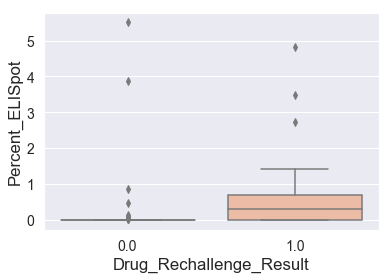

In [78]:
df['Percent_ELISpot'] = df.ELISpot_Result / df.ELISpot_Control *100
# df[df.Drug_Rechallenge_Result == 1]
# sns.boxplot(x="Drug_Rechallenge_Result", y="Percent_ELISpot",data=df, palette="coolwarm")
# remove outlier
sns.boxplot(x="Drug_Rechallenge_Result", y="Percent_ELISpot",data=df[df['Percent_ELISpot']<10], palette="coolwarm")